# loadig the exact file used in the research paper since it is randomized in startified splitting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

In [ ]:
X_train ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_X_train.csv"
X_test = "/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_X_test.csv"
y_train ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_y_train.csv"
y_test ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_y_test.csv"

In [ ]:
X_train = pd.read_csv(X_train)
X_train = X_train.values

In [ ]:
X_test = pd.read_csv(X_test)
X_test = X_test.values

In [ ]:
y_train = pd.read_csv(y_train)
y_train = y_train.values.ravel()

In [ ]:
y_test = pd.read_csv(y_test)
y_test = y_test.values.ravel()

# code with grid serach

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 1/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.333 total time=   0.0s
[CV 2/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 2/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.333 total time=   0.0s
[CV 3/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 3/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.357 total time=   0.0s
[CV 4/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=4

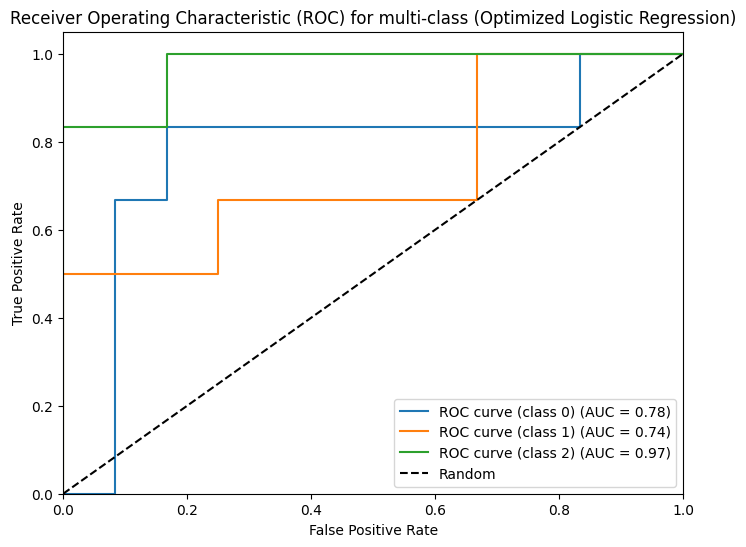

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42],
    'multi_class': ['ovr', 'multinomial'],
}
"""
# lower parameters for testing only
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],

}
"""
# Instantiate Logistic Regression classifier
log_classifier = LogisticRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(log_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_log_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_log_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_log_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_log_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_log_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


[[16  2  6]
 [ 6 15  3]
 [ 3  1 20]]
Accuracy Score: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.83      0.62      0.71        24
           2       0.69      0.83      0.75        24

    accuracy                           0.71        72
   macro avg       0.72      0.71      0.71        72
weighted avg       0.72      0.71      0.71        72



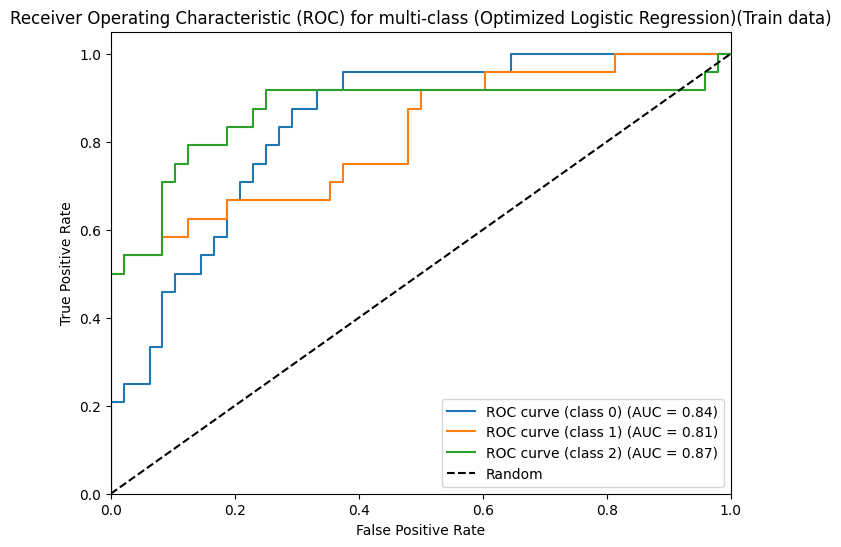

In [ ]:
# Use the best model to predict
probas = best_log_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_log_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_log_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_log_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized Logistic Regression)(Train data)')
plt.legend(loc='lower right')
plt.show()

Streaming output truncated to the last 5000 lines.
[CV 3/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 4/5; 270/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance
[CV 4/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.429 total time=   0.0s
[CV 5/5; 270/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance
[CV 5/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 1/5; 271/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform
[CV 1/5; 271/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.467 total time=   0.0s
[CV 2/5; 271/768] START algor

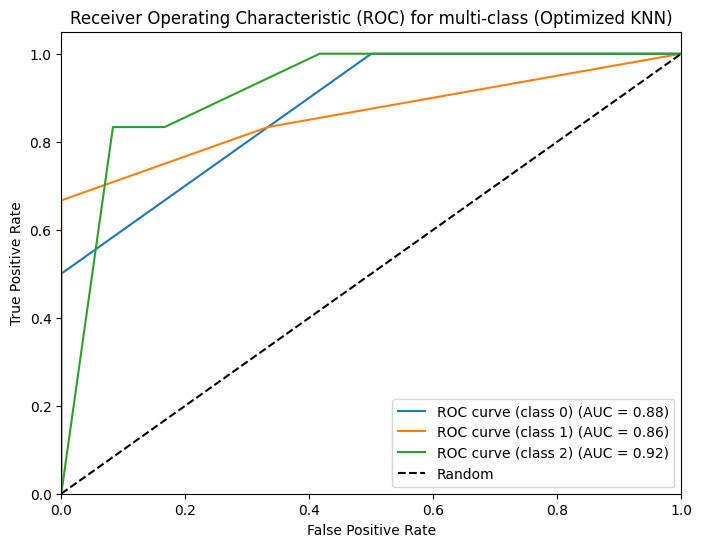

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}
"""
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for number of neighbors
    'weights': ['uniform', 'distance'],
}
"""

# Instantiate K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i],tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_knn_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized KNN)')
plt.legend(loc='lower right')
plt.show()


[[21  1  2]
 [ 5 16  3]
 [ 1  0 23]]
Accuracy Score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.94      0.67      0.78        24
           2       0.82      0.96      0.88        24

    accuracy                           0.83        72
   macro avg       0.85      0.83      0.83        72
weighted avg       0.85      0.83      0.83        72



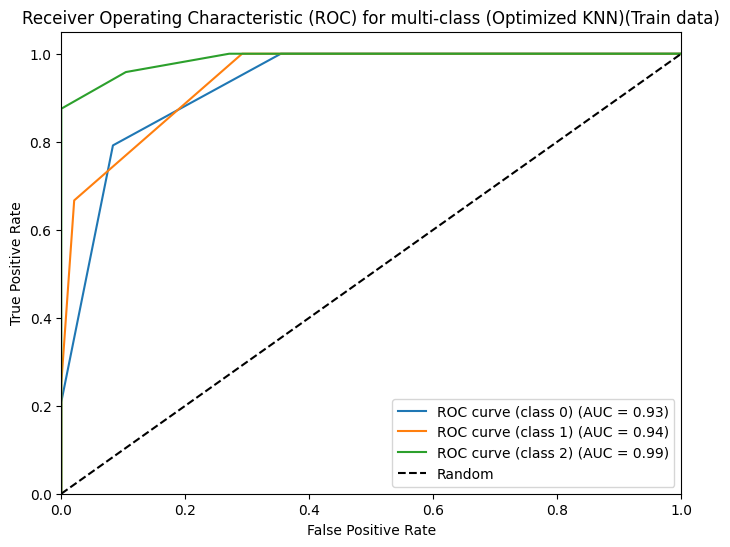

In [ ]:
# Use the best model to predict
probas = best_knn_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_knn_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_knn_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_knn_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized KNN)(Train data)')
plt.legend(loc='lower right')
plt.show()

Streaming output truncated to the last 5000 lines.
[CV 3/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.571 total time=   0.0s
[CV 4/5; 798/1296] START C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False
[CV 4/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.571 total time=   0.0s
[CV 5/5; 798/1296] START C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False
[CV 5/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.643 total time=   0.0s
[CV 1/5; 799/1296] START C=1, break_ties=False, coef0=0.5, decisio

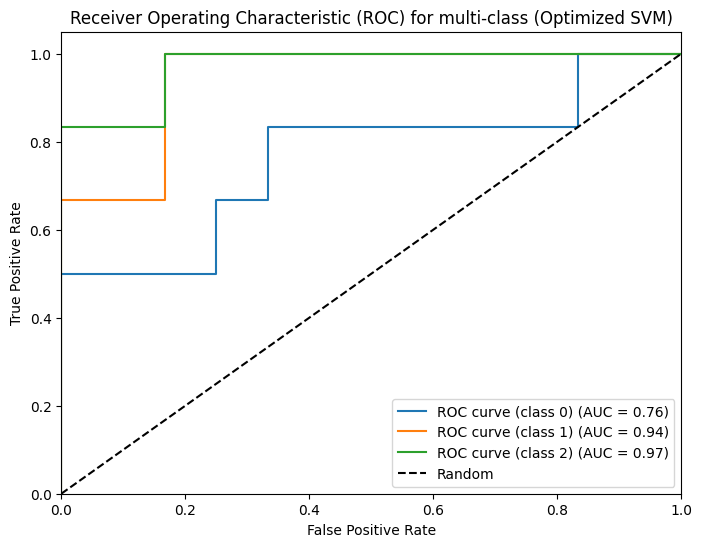

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'probability': [True],
    'decision_function_shape': ['ovr', 'ovo'],
    'break_ties': [True, False]
}

# Instantiate Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_svm_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_svm_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized SVM)')
plt.legend(loc='lower right')
plt.show()


[[19  4  1]
 [ 3 20  1]
 [ 1  0 23]]
Accuracy Score: 0.8611111111111112
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.83      0.83      0.83        24
           2       0.92      0.96      0.94        24

    accuracy                           0.86        72
   macro avg       0.86      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



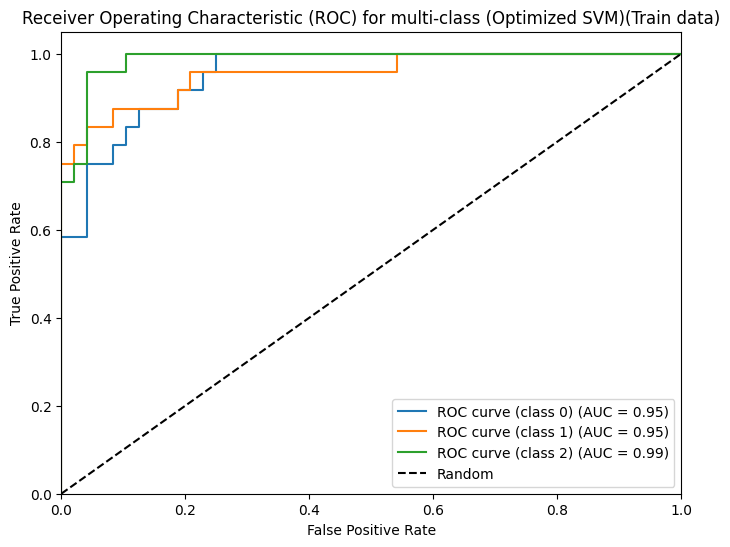

In [ ]:
# Use the best model to predict
probas = best_svm_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_svm_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_svm_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_svm_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized SVM)(Train data)')
plt.legend(loc='lower right')
plt.show()

[[5 0 1]
 [2 3 1]
 [1 0 5]]
Accuracy Score: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       1.00      0.50      0.67         6
           2       0.71      0.83      0.77         6

    accuracy                           0.72        18
   macro avg       0.78      0.72      0.72        18
weighted avg       0.78      0.72      0.72        18



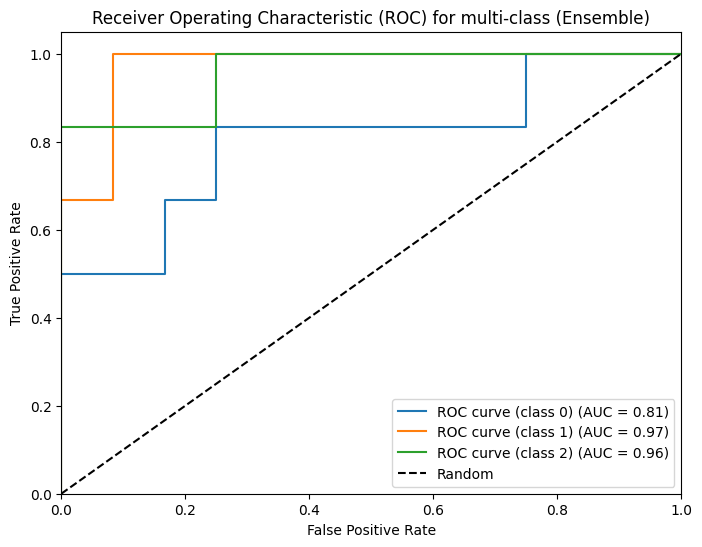

In [ ]:
from sklearn.ensemble import VotingClassifier

# Assuming you have best_svm_classifier, best_knn_classifier, and best_log_classifier

# Create a VotingClassifier with the best classifiers
ensemble_classifier = VotingClassifier(
    estimators=[
        ('svm', best_svm_classifier),
        ('knn', best_knn_classifier),
        ('logistic', best_log_classifier)
    ],
    voting='soft'
)

# Fit the ensemble classifier to the training data
ensemble_classifier.fit(X_train, y_train)

# Use the ensemble to predict probabilities on the test data
probas = ensemble_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = ensemble_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Ensemble)')
plt.legend(loc='lower right')
plt.show()

[[20  1  3]
 [ 5 17  2]
 [ 2  0 22]]
Accuracy Score: 0.8194444444444444
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.94      0.71      0.81        24
           2       0.81      0.92      0.86        24

    accuracy                           0.82        72
   macro avg       0.83      0.82      0.82        72
weighted avg       0.83      0.82      0.82        72



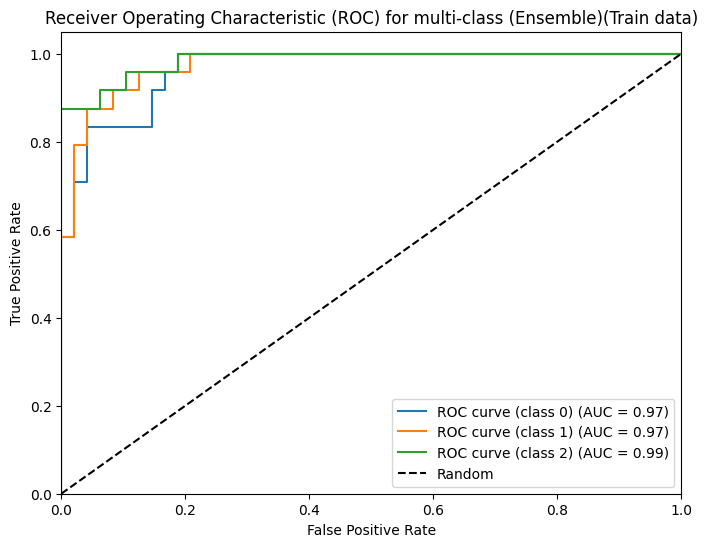

In [ ]:
# Use the best model to predict
probas = ensemble_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(ensemble_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(ensemble_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = ensemble_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Ensemble)(Train data)')
plt.legend(loc='lower right')
plt.show()